In [ ]:
import pandas as pd #reading the the file
import seaborn as sns #data visualisation
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Medical_insurance.csv')
df.head()

#Dataframe has 6 attributes/features with 1 target label(charges) which we need to predict

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Preprocessing

In [ ]:
df.shape #2772 rows consisting of data of different people

(2772, 7)

In [ ]:
#Let us look for Null values present if any
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### There are not any null values. So we don't need worry about any missing values coz all values are present

In [ ]:
df.describe() #description of the dataset

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#Let us change the categorical variables to numberical ones by mapping each varialbe to numeric values
df['sex'] = df['sex'].map({'male':1, 'female':0})
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})
df['region'] = df['region'].map({'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#### Exploratory Data Analysis


In [ ]:
#Univerate Analysis : plot the distribution of each variable to get an overview about their counts and distributions.
df.age.describe()

count    2772.000000
mean       39.109668
std        14.081459
min        18.000000
25%        26.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

'Insights:\nMost of the data is uniform and only one set of people tend to be more which is 400+'

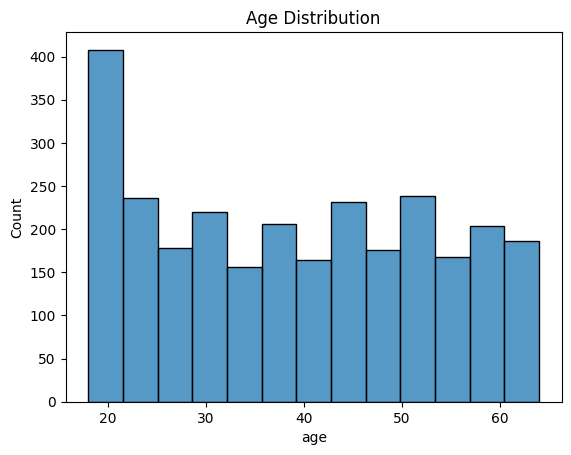

In [ ]:
sns.histplot(df['age']) #Using seaborn to visualise the graph
plt.title("Age Distribution")

"""Insights:
Most of the data is uniform and only one set of people tend to be more which is 400+"""

'Insights:\nThe distribution of ages in the dataset is almost uniform and there are no outliers present\nmimimum age is around 17 and maximum age is around 65\nBut ages 18-19 which seem twice as many customers'

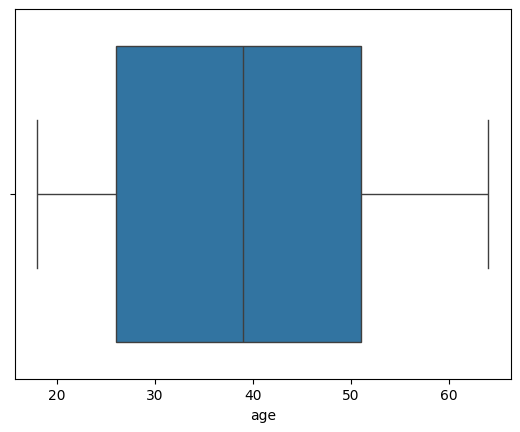

In [ ]:
sns.boxplot(df['age'], orient='h')

"""Insights:
The distribution of ages in the dataset is almost uniform and there are no outliers present
mimimum age is around 17 and maximum age is around 65
But ages 18-19 which seem twice as many customers"""


<Figure size 1500x1000 with 0 Axes>

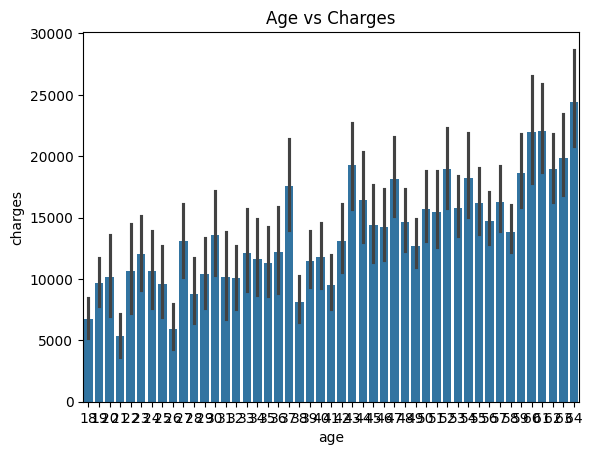

<Figure size 1500x1000 with 0 Axes>

In [ ]:
plt.title("Age vs Charges")
sns.barplot(x=df['age'], y= df['charges'])
plt.figure(figsize=(15,10))

'Insight:\nFemale number are almost equal to the males'

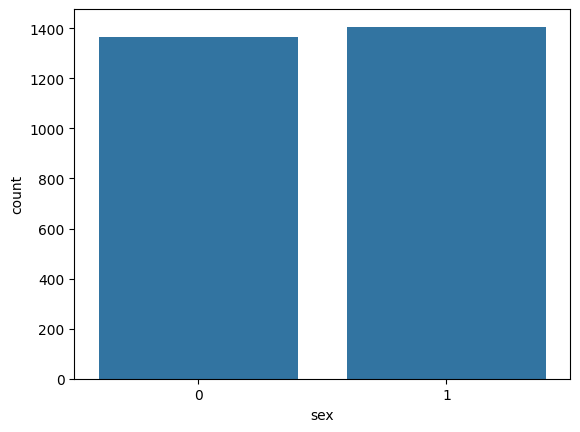

In [ ]:
sns.countplot(x= 'sex', data=df)
"""Insight:
Female number are almost equal to the males"""

'"About 20% of the customers are smokers here'

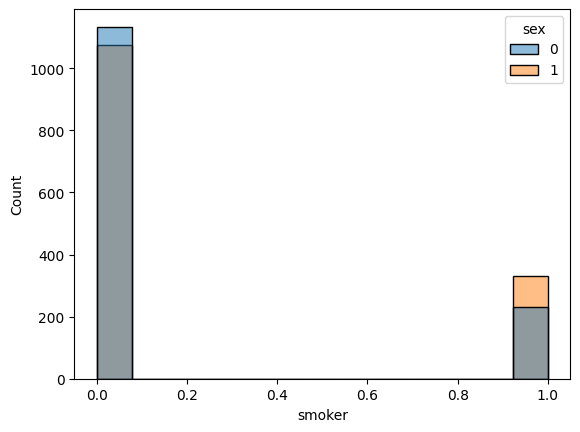

In [ ]:
sns.histplot(x= df['smoker'], hue=df['sex'])
""""About 20% of the customers are smokers here"""

'We can see that most of the expenses are below 15000 from most of the customers. '

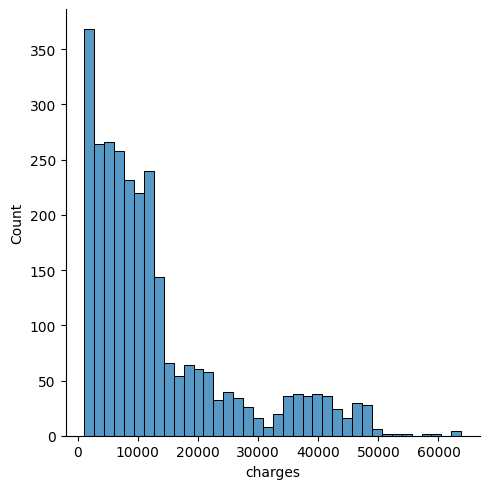

In [ ]:
sns.displot(df['charges'])

"""We can see that most of the expenses are below 15000 from most of the customers. """

In [ ]:
# plt.figure(figsize=(8, 6))
# sns.barplot(data=df, x='smoker', y='charges', hue='sex')
# plt.title("Smoker vs Charges")
# plt.show()


##### Coorelation

In [ ]:
df.corr()
#This helps us find out which features are most dependent on charges.

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,0.000932,0.298624
sex,-0.026046,1.000000,0.042924,0.016020,0.082326,0.004808,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.159178,0.199846
children,0.037574,0.016020,-0.001492,1.000000,0.006362,0.016111,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,-0.006751,0.788783
region,0.000932,0.004808,0.159178,0.016111,-0.006751,1.000000,-0.013530
charges,0.298624,0.062837,0.199846,0.066442,0.788783,-0.013530,1.000000


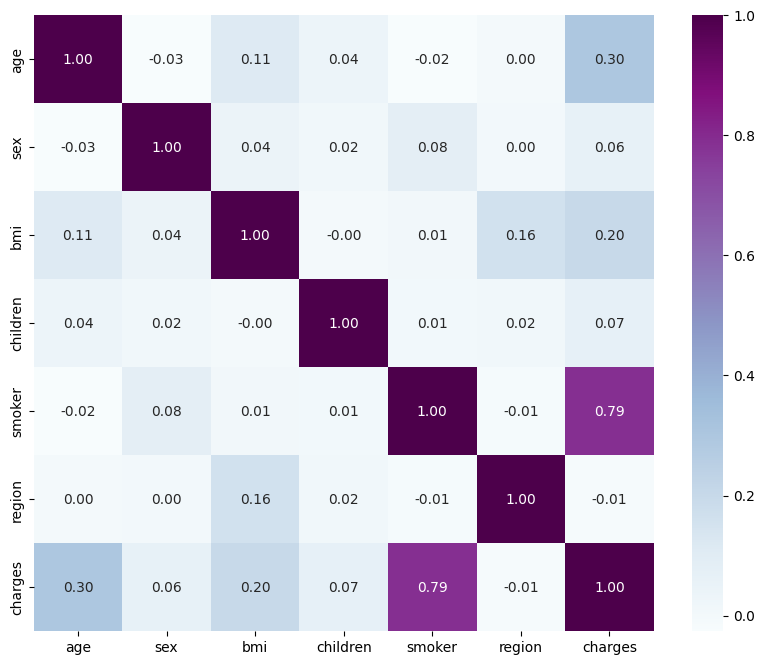

In [ ]:
#Visulization of the dependencies on medical charges using heatmap
fig, ax = plt.subplots(figsize=(10, 8))
heatmap = sns.heatmap(df.corr(), cmap='BuPu', annot=True, fmt=".2f", ax=ax)
plt.show()


##### It is clear from the above heatmap that smoker, age and bmi are the most dependent features for the label - charges. We can get rid of the other features and start on building the model
#### Scaling the feature values:
##### Scaling the values using Standard Scalar- It is done by subtracting each value of respective feature by that column mean and divide by standard deviation. When we do this, it helps to center the values of features around center (i.e with mean 0) and standard dev of 1.


In [ ]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler() #Instantiate the object

df_m = df.copy()

# Scale the 'age', 'bmi', and 'charges' columns.
df_m['age'] = scale.fit_transform(df[['age']])
df_m['bmi'] = scale.fit_transform(df[['bmi']])
df_m['charges'] = scale.fit_transform(df[['charges']])
#fit_transform() method expects a numerical array-like input. So avoid passing a string ('age', 'bmi', 'charges').

df_m.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.428353,0,-0.457114,0,1,3,0.298245
1,-1.499381,1,0.500731,1,0,2,-0.949483
2,-0.789099,1,0.375085,3,0,2,-0.725285
3,-0.433959,1,-1.304814,0,0,1,0.717976
4,-0.504987,1,-0.297201,0,0,1,-0.773238


##### We are done with the preprocessing steps. Let us divide the dataset into X as features and y as label

In [ ]:
""" """
X = df_m.drop('charges', axis=1).values
# y = df_m['charges'].values.reshape(-1,1)
y = df_m[['charges']].values #giving array like input
print(y)


[[ 0.29824529]
 [-0.94948308]
 [-0.72528517]
 ...
 [ 0.26252147]
 [ 0.68595083]
 [-0.28074541]]


In [ ]:
"""Splitting the dataset into train and test """
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (2356, 6)
Size of y_train :  (2356, 1)
Size of X_test :  (416, 6)
Size of Y_test :  (416, 1)


#### Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
"""cross_val_score - Evaluates the performance of ML algorithm.
Splits the dataset into multiple subsets, called folds, and then train and evaluate the model multiple times,
each time using a different fold as the test set and the remaining folds as the training set.
"""
from sklearn.metrics import r2_score, mean_squared_error

cvs_linear_reg_model = cross_val_score(estimator=linear_reg_model, X=X, y=y, cv=10) #X = features, y = label

y_pred_linear_reg_model_train = linear_reg_model.predict(X_train)
r2_score_linear_reg_model_train = r2_score(y_train, y_pred_linear_reg_model_train)

y_pred_linear_reg_model_test = linear_reg_model.predict(X_test)
r2_score_linear_reg_model_test = r2_score(y_test, y_pred_linear_reg_model_test)

rmse_linear = mean_squared_error(y_test, y_pred_linear_reg_model_test) #Loss function


print('CV Linear Regression : {0:.3f}'.format(cvs_linear_reg_model.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_model_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_model_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.748
R2_score (train) : 0.752
R2_score (test) : 0.744
RMSE : 0.258


#### Insights:
CV Linear Regression: This is the average R-squared score obtained from performing 10-fold cross-validation. It represents how well the linear regression model generalizes to unseen data.

R2_score (train): This is the R-squared score obtained from evaluating the model on the training data. It indicates how well the model fits the training data.

Root-Mean-Square-Error: This is the root mean squared error, which measures the average deviation of the predicted values from the actual values in the test set.

So, The R-squared scores are relatively high, suggesting a good fit to the data, and the RMSE is low, indicating accurate predictions.


#### Support Vector Regression (SVR):
The main objective of the SVM algorithm is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space. The hyperplane tries that the margin between the closest points of different classes should be as maximum as possible. The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane.


In [ ]:
X_s = df_m.drop('charges', axis=1).values
y_s = df_m[['charges']].values
print(X_s)
print("Printing the labesls")
print(y_s)

[[-1.42835311  0.         -0.45711365  0.          1.          3.        ]
 [-1.49938129  1.          0.50073091  1.          0.          2.        ]
 [-0.7890995   1.          0.37508521  3.          0.          2.        ]
 ...
 [-1.42835311  1.         -0.76225322  1.          1.          1.        ]
 [-1.14424039  1.         -1.95588746  0.          0.          1.        ]
 [ 1.05763316  1.          0.14663846  0.          0.          3.        ]]
Printing the labesls
[[ 0.29824529]
 [-0.94948308]
 [-0.72528517]
 ...
 [ 0.26252147]
 [ 0.68595083]
 [-0.28074541]]


We already standardized the features in df_m while doing calculation in regression model. Now we can simply use the svm model on scaled and standardized data.

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.15, random_state=42)

svr = SVR() #model initialized

parameters = {
    'kernel': ['rbf', 'sigmoid', 'poly'], #determines the shape of the decision boundary or hyperplane
    'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
    'tol': [0.0001],
    'C': [0.001, 0.01, 0.1, 1, 10, 100] #parameter (C) in SVR controls the trade-off between minimizing the error and maximizing the margin.
}

#Let us use the GridSearch to find the best parameters for SVR
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=2, verbose=4, n_jobs=-1)
svr_grid.fit(X_train_s, y_train_s.ravel())

Fitting 2 folds for each of 90 candidates, totalling 180 fits


In [ ]:
best_params = svr_grid.best_params_
print("Best hyperparameters:", best_params)

In [ ]:
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train_s, y_train_s.ravel())

In [ ]:
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)

y_predict_s_train = svr.predict(X_train_s)
rmse_score_svr_train = r2_score(y_train_s, y_predict_s_train)

y_predict_s_test = svr.predict(y_train_s)
rmse_score_svr_test = r2_score(y_test_s, y_predict_s_test)

rmse_svr = r2_score(rmse_score_svr_train, rmse_score_svr_test)

print('R2_score (train) : {0:.3f}'.format(rmse_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(rmse_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))


#### Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier()

parameters = { 'n_estimators':[600,1000,1200],
             'max_features': ["auto"],
             'max_depth':[40,50,60],
             'min_samples_split': [5,7,9],
             'min_samples_leaf': [7,10,12],
             'criterion': ['mse']}

#Let us use the GridSearch to find the best parameters for SVR
rfc_grid = GridSearchCV(estimator=rfc, param_grid=parameters, cv=2, verbose=4, n_jobs=-1)
rfc_grid.fit(X_train_s, y_train_s.ravel())

In [ ]:
reg_rf_gscv.best_score_, reg_rf_gscv.best_estimator_

According to the best estimator we got, set the parameters in the model because these would be the best parameters to get the good model.

In [ ]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,n_estimators=1200)
rf_reg.fit(X_train_s, y_train_s.ravel())

In [ ]:
y_predict_rf_train = rf_reg.predict(X_train_s)
rmse_score_rf_train = r2_score(y_train_s, y_predict_rf_train)

y_predict_rf_test = rf_reg.predict(y_train_s)
rmse_score_rf_test = r2_score(y_test_s, y_predict_rf_test)

rmse_rf = r2_score(rmse_score_rf_train, rmse_score_rf_test)

print('R2_score (train) : {0:.3f}'.format(rmse_score_rf_train))
print('R2 score (test) : {0:.3f}'.format(rmse_score_rf_test))
print('RMSE : {0:.3f}'.format(rmse_rf))